In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error,precision_score,recall_score,f1_score


In [2]:
#导入数据
#对缺失值进行填补
train_X = np.empty(shape=[0,268],dtype=float)
train_Y = []
filePath = 'D:\Temple\jupyter_psychology\Shen268\ROI_FC_r_per\session1'
filePath_list = os.listdir(filePath)
cnt_nan = 0
for fp in filePath_list:
    fp_a = ['D:\Temple\jupyter_psychology\Shen268\ROI_FC_r_per\session1\\'+fp,'D:\Temple\jupyter_psychology\Shen268\ROI_FC_r_per\session2\\'+fp,'D:\Temple\jupyter_psychology\Shen268\ROI_FC_r_per\session3\\'+fp]
    train_Y = np.append(train_Y,[0,1,2],axis=0)
    for i in range(3):
        data =  np.loadtxt(fp_a[i])
        
        #数据去中心化，感觉没必要
        #data = data.apply(lambda x:(x - x.mean()))
        #PCA降维，二维矩阵变一维
        pca_alg = PCA(n_components = 1, whiten=True)
        data = pca_alg.fit_transform(data)
        data = data.ravel()
        train_X = np.append(train_X,[data],axis=0)
        #print(data)
        #print(train_X)

In [3]:
# 数据标准化 特征标度
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
# 数据划分
train_x = train_X[:159]
train_y = train_Y[:159]
test_x = train_X[159:]
test_y = train_Y[159:]
# 数据标准化 特征标度
scaler = StandardScaler()
X_train = scaler.fit_transform(train_x)
X_test = scaler.transform(test_x)

In [4]:
# 初始化分类器
params = {
    'booster': 'gbtree',
    'objective': 'multiclass',
    'num_class': 3,
    'num_leaves': 31,
    'subsample': 0.8,
    'bagging_freq': 1,
    'feature_fraction ': 0.8,
    'colsample_bytree':0.9,
    'slient': 1,
    'learning_rate ': 0.01,
    'seed': 0,
    'lambda_l1':0.1,
    'lambda_l2':0.2,
    'max_depth':5,
}
best_depth = 0
best_score = 0
for max_depth in range(3,10):
    classifier = RandomForestClassifier(max_depth=max_depth,n_estimators=20, criterion='entropy', random_state=42)
    classifier.fit(X_train, train_y)
    pred_test_y = classifier.predict(X_test)
    score = accuracy_score(test_y, pred_test_y)
    print(score)
    if score > best_score:
        best_score = score
        best_depth = max_depth
        print(best_depth)
    
classifier = RandomForestClassifier(max_depth=best_depth,n_estimators=20, criterion='entropy', random_state=42)

0.5238095238095238
3
0.47619047619047616
0.5
0.5
0.47619047619047616
0.4523809523809524
0.40476190476190477


In [5]:
# 留一交叉验证
sum_acc = 0
sum_pre = 0
sum_rec = 0
sum_f1 = 0
scaler = StandardScaler()
X = np.arange(0,201,3)
total_importance = []
total_sorted_importance = []

df = pd.read_csv("shen_268_parcellation_networklabels.csv",encoding="utf-8")
importance = {'medial frontal':0,'frontoparietal':0,'default mode':0,'subcortical-cerebellum':0,'motor':0,'visual I':0,'visual II':0,'visual association':0}
net_name = ['medial frontal','frontoparietal','default mode','subcortical-cerebellum','motor','visual I','visual II','visual association']

loo = LeaveOneOut()
for train_index , test_index in loo.split(X):  # 调用split方法切分数据
    train_x = train_X[X[train_index]]
    train_y = train_Y[X[train_index]]
    #print('train_index:%s , test_index: %s ' %(X[train_index],X[test_index]))
    #print(train_x,train_y)
    train_x = np.append(train_x,train_X[X[train_index]+1],axis=0)
    train_y = np.append(train_y,train_Y[X[train_index]+1],axis=0)
    #print(train_x,train_y,)
    train_x = np.append(train_x,train_X[X[train_index]+2],axis=0)
    train_y = np.append(train_y,train_Y[X[train_index]+2],axis=0)
    #print(train_x,train_y)
    test_x = train_X[X[test_index]]
    test_y = train_Y[X[test_index]]
    test_x = np.append(test_x,train_X[X[test_index]+1],axis=0)
    test_x = np.append(test_x,train_X[X[test_index]+2],axis=0)
    test_y = np.append(test_y,train_Y[X[test_index]+1],axis=0)
    test_y = np.append(test_y,train_Y[X[test_index]+2],axis=0)
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    params = {
        'booster': 'gbtree',
        'objective': 'multiclass',
        'num_class': 3,
        'num_leaves': 31,
        'subsample': 0.8,
        'bagging_freq': 1,
        'feature_fraction ': 0.8,
        'colsample_bytree':0.9,
        'slient': 1,
        'learning_rate ': 0.01,
        'seed': 0,
        'lambda_l1':0.1,
        'lambda_l2':0.2,
        'max_depth':5,
    }
    
    best_depth = 3
    best_score = 0
    for max_depth in range(3,10):
        classifier = RandomForestClassifier(max_depth=max_depth,n_estimators=20, criterion='entropy', random_state=42)
        classifier.fit(train_x, train_y)
        pred_test_y = classifier.predict(test_x)
        score = accuracy_score(test_y, pred_test_y)
        #print(score)
        if score > best_score:
            best_score = score
            best_depth = max_depth
            #print(best_depth)
    
    RF = RandomForestClassifier(max_depth=best_depth,n_estimators=20, criterion='entropy', random_state=42)
    RF.fit(train_x, train_y)

    # 预测
    pred_test_y = RF.predict(test_x)
    pred_train_y = RF.predict(train_x)
    #print('画出训练结果...')
    #ax = gbm.plot_metric(evals_result, metric='auc')  # metric的值与之前的params里面的值对应
    #plt.show()
    #print('Plot 3th tree...')  # 画出决策树，其中的第三颗
    #gbm.plot_tree(gbm, tree_index=5, figsize=(20, 8), show_info=['split_gain'])
    #plt.show()
    
    #print ('Train Accuracy: %.4f' % accuracy_score(train_y,pred_train_y))
    #print ('Test Accuracy: %.4f' % accuracy_score(test_y,pred_test_y))
    #print('train_index:%s , test_index: %s ' %(X[train_index],X[test_index]))
    #print(train_x,train_y)
    sum_acc += accuracy_score(test_y,pred_test_y)
    sum_pre += precision_score(test_y,pred_test_y,average='macro')
    sum_rec += recall_score(test_y,pred_test_y,average='macro')
    sum_f1 += f1_score(test_y,pred_test_y,average='macro')
    
    '''
    ## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
    confusion_matrix_result = confusion_matrix(pred_test_y,test_y)
    # 利用热力图对于结果进行可视化
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    confusion_matrix_result = confusion_matrix(pred_train_y,train_y)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
    '''
    
    Node_importance = RF.feature_importances_
    # Compute net_importance
    df = pd.read_csv("shen_268_parcellation_networklabels.csv",encoding="utf-8")
    net_importance = {'medial frontal':0,'frontoparietal':0,'default mode':0,'subcortical-cerebellum':0,'motor':0,'visual I':0,'visual II':0,'visual association':0}
    
    sum_Node_importance = 0  #sum of all the Node importance
    for i in range(0,268):
        net_importance[net_name[df['Network'][i]-1]] += Node_importance[i]
        #sum_Node_importance += Node_importance[i]
    """"""
    tmp = [29,34,20,90,50,18,9,18]
    sum_importance = 0
    for x in range(8):
        net_importance[net_name[x]] = net_importance[net_name[x]]/tmp[x]
        sum_importance += net_importance[net_name[x]]
    
    for x in range(8):
        # 每次迭代每个网络的得分
        net_importance[net_name[x]] = net_importance[net_name[x]]/sum_importance
        #net_importance[net_name[x]] = net_importance[net_name[x]]/sum_Node_importance
        importance[net_name[x]] += net_importance[net_name[x]]
        
    #print(importance)
    total_importance.append(net_importance)
    # Sort importances
    dict1_sorted_values = sorted(net_importance.items(),key = lambda x:x[1],reverse = True)
    sorted_net = {k:v for k,v in dict1_sorted_values}
    total_sorted_importance.append(sorted_net)
    


D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision 

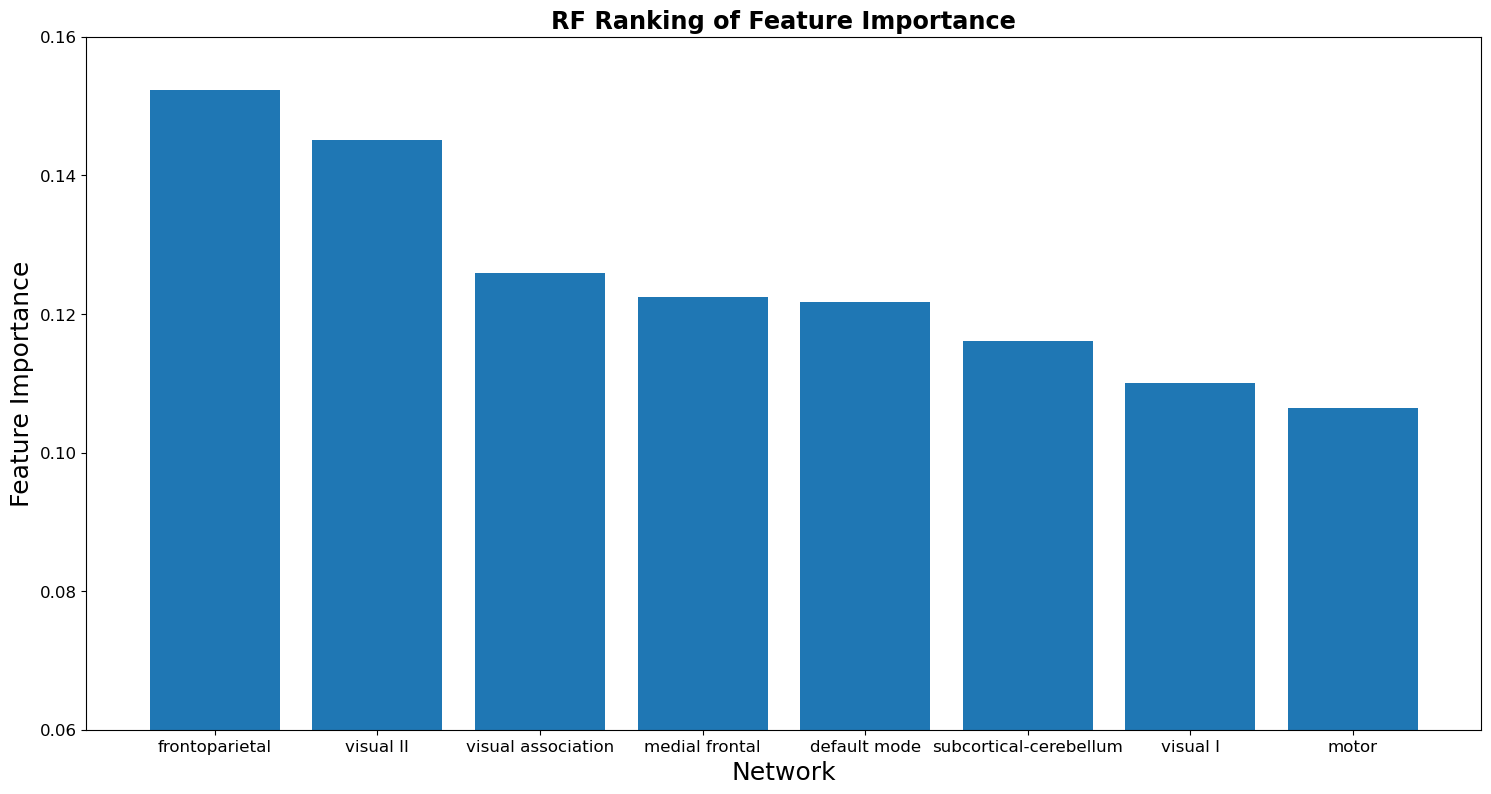

In [6]:
# Sort importances
dict1_sorted_values = sorted(importance.items(),key = lambda x:x[1],reverse = True)
sorted_net = {k:v for k,v in dict1_sorted_values}
sum_imp = 0
for i in sorted_net.values():
    sum_imp += i
for i in sorted_net.keys():
    sorted_net[i] = sorted_net[i]/sum_imp
# Plot importances 
plt.figure(figsize=(18, 9))
plt.ylim(0.06,0.16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.bar(sorted_net.keys(), sorted_net.values())
plt.title('RF Ranking of Feature Importance',fontsize='xx-large',fontweight='heavy')
plt.xlabel('Network',fontsize=18)
plt.ylabel('Feature Importance',fontsize=18)
plt.show()
#total_sorted_importance


In [7]:
print(sum_acc/67,sum_pre/67,sum_rec/67,sum_f1/67)

0.6567164179104475 0.5290215588723052 0.6567164179104475 0.5704809286898841


In [8]:
import math
cnt = 0
net_variance = np.zeros(8)
net_score = np.zeros(8)
for i in range(8):
    for j in range(67):
        net_score[i] += total_sorted_importance[j][net_name[i]]
    net_score[i] /= 67
    
for i in range(8):
    for j in range(67):
        net_variance[i] += math.pow((total_sorted_importance[j][net_name[i]] - net_score[i]),2)
    net_variance[i] /= 67
    net_variance[i] = math.sqrt(net_variance[i])


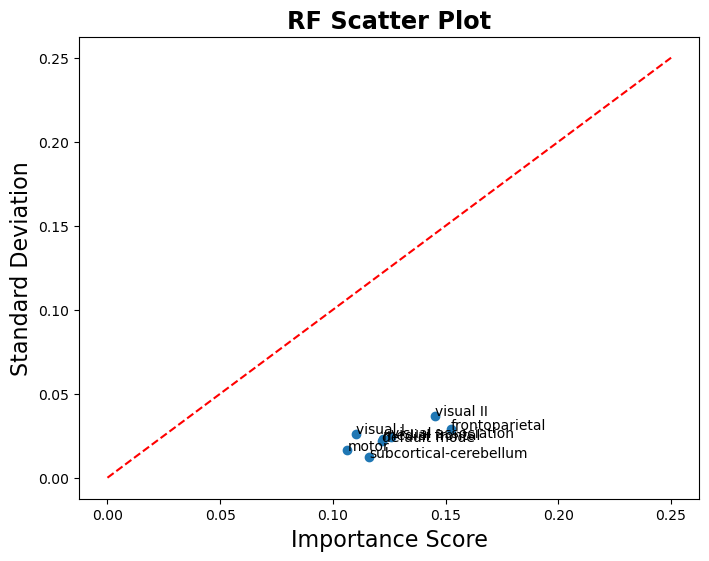

{'frontoparietal': 0.15230265809149676, 'visual II': 0.1451326297095586, 'visual association': 0.1259624642671128, 'medial frontal': 0.12240698709082216, 'default mode': 0.12172226678697855, 'subcortical-cerebellum': 0.11606282666381686, 'visual I': 0.11002655253542214, 'motor': 0.1063836148547921}
[0.12240699 0.15230266 0.12172227 0.11606283 0.10638361 0.11002655
 0.14513263 0.12596246]
[0.02309293 0.02891144 0.02176573 0.01207019 0.01625392 0.02617228
 0.03698622 0.02417341]


In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(net_score,net_variance)
#plt.plot([0, 0, 0, 0])
for i, name in enumerate(['medial frontal','frontoparietal','default mode','subcortical-cerebellum','motor','visual I','visual II','visual association']):
    plt.annotate(name,(net_score[i],net_variance[i]))
plt.title('RF Scatter Plot',fontsize='xx-large',fontweight='heavy')
plt.xlabel('Importance Score',fontsize=16)
plt.ylabel('Standard Deviation',fontsize=16)
x_line = np.linspace(0,0.25)
y_line = x_line
plt.plot(x_line, y_line, 'r--')
plt.show()
print(sorted_net)
print(net_score)
print(net_variance)

In [10]:
total_importance

[{'medial frontal': 0.12773684480305478,
  'frontoparietal': 0.11324163542892865,
  'default mode': 0.10936529569863897,
  'subcortical-cerebellum': 0.1253063915446397,
  'motor': 0.1040006778486909,
  'visual I': 0.13044938689391364,
  'visual II': 0.1527391016533638,
  'visual association': 0.13716066612876945},
 {'medial frontal': 0.12991017577609573,
  'frontoparietal': 0.12057829321551984,
  'default mode': 0.10299860646717388,
  'subcortical-cerebellum': 0.12031806114803692,
  'motor': 0.09991438325944364,
  'visual I': 0.11759771786637714,
  'visual II': 0.17735378950490824,
  'visual association': 0.1313289727624445},
 {'medial frontal': 0.12342330069197203,
  'frontoparietal': 0.11699576853699105,
  'default mode': 0.1075842772704644,
  'subcortical-cerebellum': 0.11772059117926789,
  'motor': 0.0949001689596781,
  'visual I': 0.13105142443377898,
  'visual II': 0.15270068984919496,
  'visual association': 0.15562377907865246},
 {'medial frontal': 0.13478060228734073,
  'front

In [11]:
np.savetxt("RF_total_importance.txt",total_importance)

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')